In [45]:
import pandas as pd

#read data file
df = pd.read_csv('data.csv', sep=';')

df_total_total = df[df['Nuttige toepassing en eindverwerking'] == 'Totaal bedrijfsafvalstoffen']
df_total_recovered = df[df['Nuttige toepassing en eindverwerking'] == 'Totaal nuttige toepassing']
df_total_leftover = df[df['Nuttige toepassing en eindverwerking'] == 'Totaal eindverwerking']

In [46]:
def remove_rows(df):
    #remove rows where Bedrijfstakken/branches (SBI 2008) == '31-32 Meubel- en overige industrie' or '31-33 Overige industrie en reparatie' or '24-30, 33 Metalektro'
    df = df[df['Bedrijfstakken/branches (SBI 2008)'] != '31-32 Meubel- en overige industrie']
    df = df[df['Bedrijfstakken/branches (SBI 2008)'] != '31-33 Overige industrie en reparatie']
    df = df[df['Bedrijfstakken/branches (SBI 2008)'] != '24-30, 33 Metalektro']
    return df


In [47]:
#2021* should be converted to 2021 in the Perioden column
def clean_df(df):
    df['Perioden'] = df['Perioden'].str.replace('2021*','2021')
    df = df.rename(columns={'Perioden': 'year'})
    df = df.drop(columns=['Bedrijfsafvalstoffen', 'Nuttige toepassing en eindverwerking'])
    return df


In [48]:
def clean_bedrijfsafval(df):
    #strip figures in column 'Bedrijfsafval (1 000 ton)'
    df['Bedrijfsafval (1 000 ton)'] = df['Bedrijfsafval (1 000 ton)'].str.replace(' ','')

    #remove rows where 'Bedrijfsafval (1 000 ton)' is .
    df = df[~df['Bedrijfsafval (1 000 ton)'].str.contains("\.")]
    
    return df


In [49]:
def convert_year_to_datetime(df):
    df['year'] = pd.to_datetime(df['year'], format='%Y')
    return df


In [50]:
def clean_and_group(df):
    #groupby Bedrijfstakken/branches (SBI 2008)
    df_total = df.groupby(['year', 'Bedrijfstakken/branches (SBI 2008)']).sum()

    #remove any row with '.' in 'Bedrijfsafval (1 000 ton)'
    df_total = df_total[~df_total['Bedrijfsafval (1 000 ton)'].str.contains("\.")]
    
    return df_total


In [51]:
def convert_to_float(df):
    df['Bedrijfsafval (1 000 ton)'] = df['Bedrijfsafval (1 000 ton)'].astype(float)
    return df


In [56]:
import pandas as pd
#plot stacked area chart
import matplotlib.pyplot as plt

def plot_stacked_area_chart(df):
    plot = df.unstack().plot(kind='area', stacked=True, figsize=(20, 10))
    return plot


In [53]:
#make function to apply all functions
def apply_all(df):
    df = remove_rows(df)
    df = clean_df(df)
    df = clean_bedrijfsafval(df)
    df = convert_year_to_datetime(df)
    df = clean_and_group(df)
    df = convert_to_float(df)
    return df

In [54]:
#apply function for the 3 dfs
df_total_total = apply_all(df_total_total)
df_total_recovered = apply_all(df_total_recovered)
df_total_leftover = apply_all(df_total_leftover)


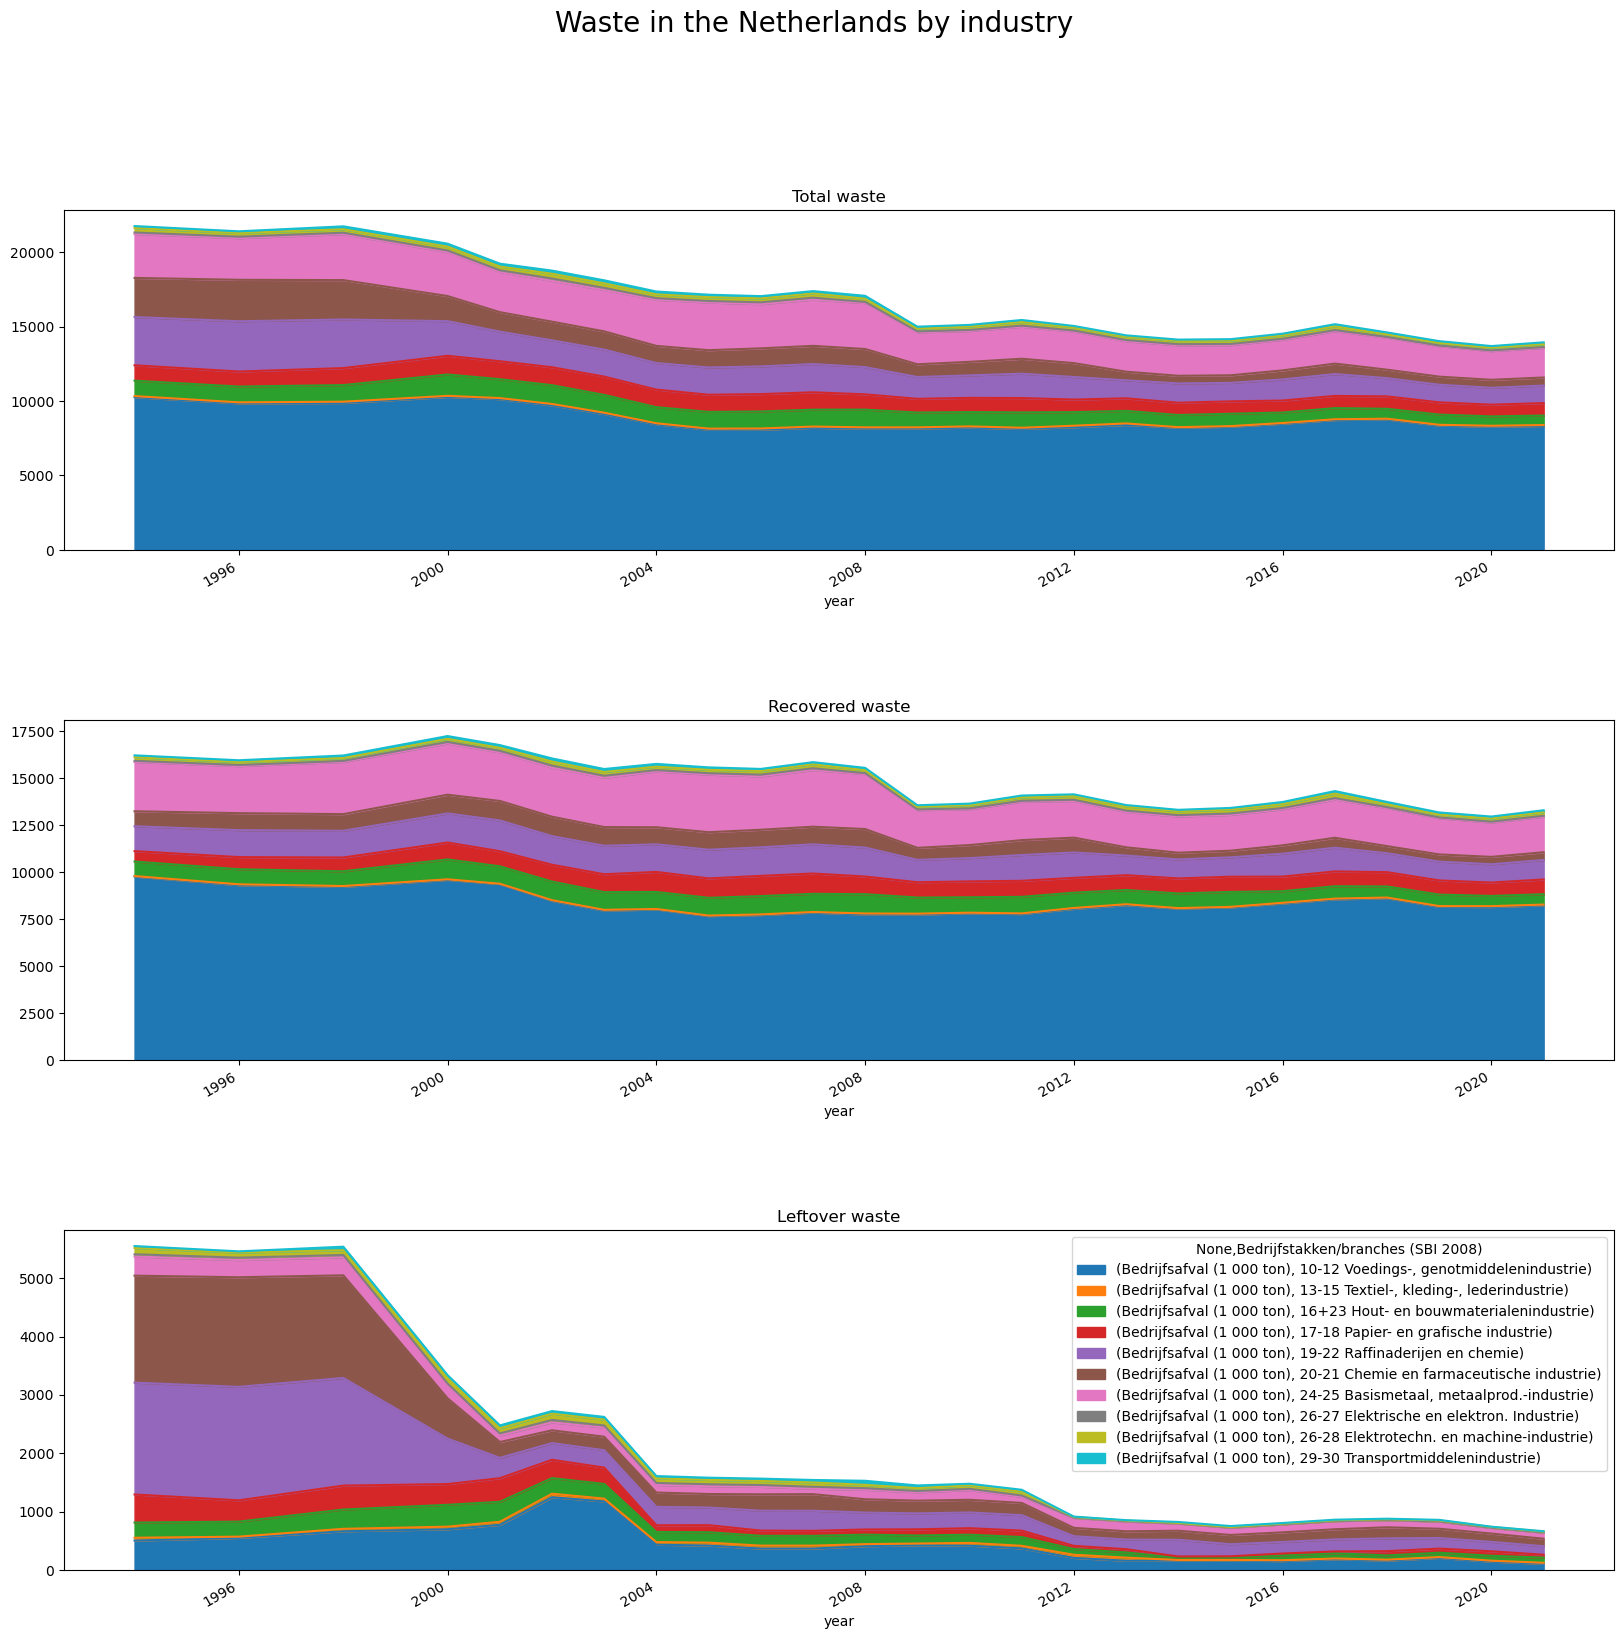

In [63]:
#plot three stacked area charts as subplots
fig, ax = plt.subplots(3, 1, figsize=(20, 20))
ax[0].set_title('Total waste')
ax[1].set_title('Recovered waste')
ax[2].set_title('Leftover waste')
df_total_total.unstack().plot(kind='area', stacked=True, ax=ax[0])
df_total_recovered.unstack().plot(kind='area', stacked=True, ax=ax[1])
df_total_leftover.unstack().plot(kind='area', stacked=True, ax=ax[2])
#put space between the charts
plt.subplots_adjust(hspace=0.5)

#only 1 legend is necessary
ax[0].legend().set_visible(False)
ax[1].legend().set_visible(False)
#add a descriptive title
plt.suptitle('Waste in the Netherlands by industry', fontsize=20)
plt.show()



In [ ]:
#